Big Mart Sales Prediction

Importing the lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Dtata Collection and Analysis

In [4]:
big_mart=pd.read_csv('/content/big_mart_data.csv')
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
big_mart.shape

(8523, 12)

In [7]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(),inplace=True)

In [23]:
big_mart['Outlet_Size'].fillna(big_mart['Outlet_Size'].mode()[0],inplace=True)

In [24]:
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


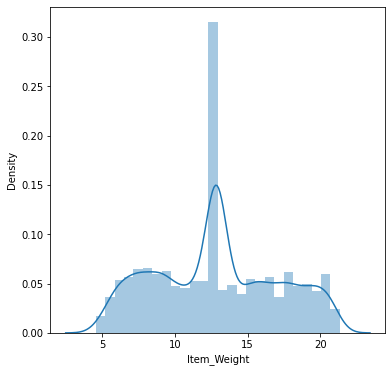

In [30]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Weight'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


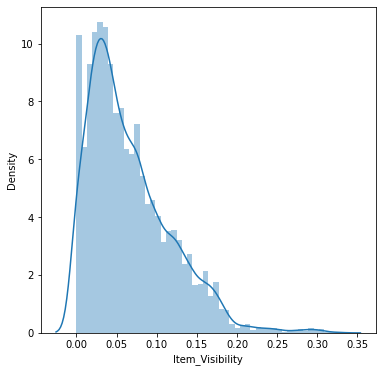

In [31]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


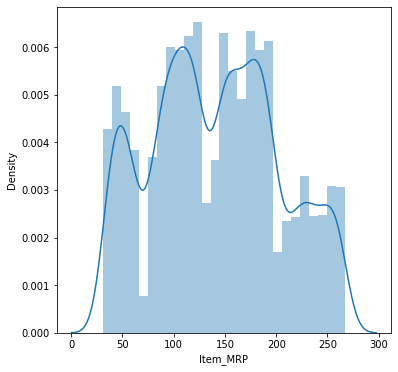

In [32]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_MRP'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


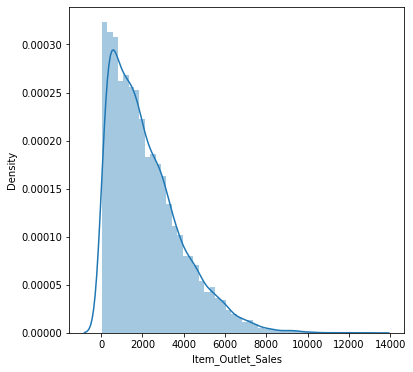

In [34]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

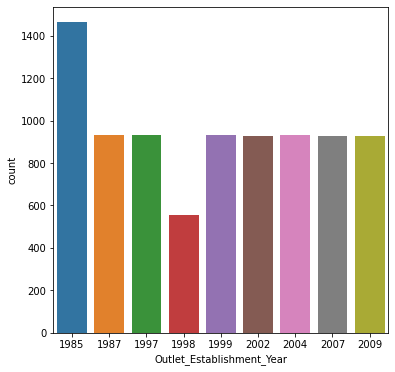

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart)
plt.show()

In [47]:
big_mart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [49]:
encoder=LabelEncoder()

In [52]:
big_mart['Item_Identifier']=encoder.fit_transform(big_mart['Item_Identifier'])
big_mart['Item_Fat_Content']=encoder.fit_transform(big_mart['Item_Fat_Content'])
big_mart['Item_Type']=encoder.fit_transform(big_mart['Item_Type'])
big_mart['Outlet_Identifier']=encoder.fit_transform(big_mart['Outlet_Identifier'])
big_mart['Outlet_Size']=encoder.fit_transform(big_mart['Outlet_Size'])
big_mart['Outlet_Location_Type']=encoder.fit_transform(big_mart['Outlet_Location_Type'])
big_mart['Outlet_Type']=encoder.fit_transform(big_mart['Outlet_Type'])

In [53]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [56]:
x=big_mart.drop('Item_Outlet_Sales',axis=1)
y=big_mart['Item_Outlet_Sales']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
regressor=XGBRegressor()

In [59]:
regressor.fit(x_train,y_train)

[17:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [61]:
x_train_prediction=regressor.predict(x_train)
r2_train=metrics.r2_score(x_train_prediction,y_train)
print(r2_train)

0.3950892008477641


In [62]:
x_test_prediction=regressor.predict(x_test)
r2_test=metrics.r2_score(x_test_prediction,y_test)
print(r2_test)

0.24772264220694928
